<a href="https://colab.research.google.com/github/pushkarsri999/eda_project_on_airbnb_hotel_booking_analysis/blob/main/My_project_on_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(25,8)

In [ ]:
file_path="/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv"
data=pd.read_csv(file_path)


In [ ]:
# sample of our data is
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


i am starting our E.D.A. here i am analysing the variables, and analysing that there is any need of data cleaning


In [ ]:
# checking of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here four((name,host_name,last_reviews,reviews_per_month) out of sixteen variable are ambiguous so i am droping these variable 
reviews_per_month column has nan values which must be replaced by zeros in order to make our data meaningful

In [ ]:
data.drop(['name','host_name','last_review'],axis=1,inplace=True)

In [ ]:
# removing nan values from coloum review_per_month
data.fillna({'reviews_per_month':0},inplace=True)

now our data in little bit clean now i am starting our observation

In [ ]:
#exploring cleaned data 
relevent=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here minimum value of price is zero so i can exclude this obsevation 

In [ ]:
# excluding rows with price as Zero
data=data.loc[data['price']>0]
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


now we see the  mathup among variable.

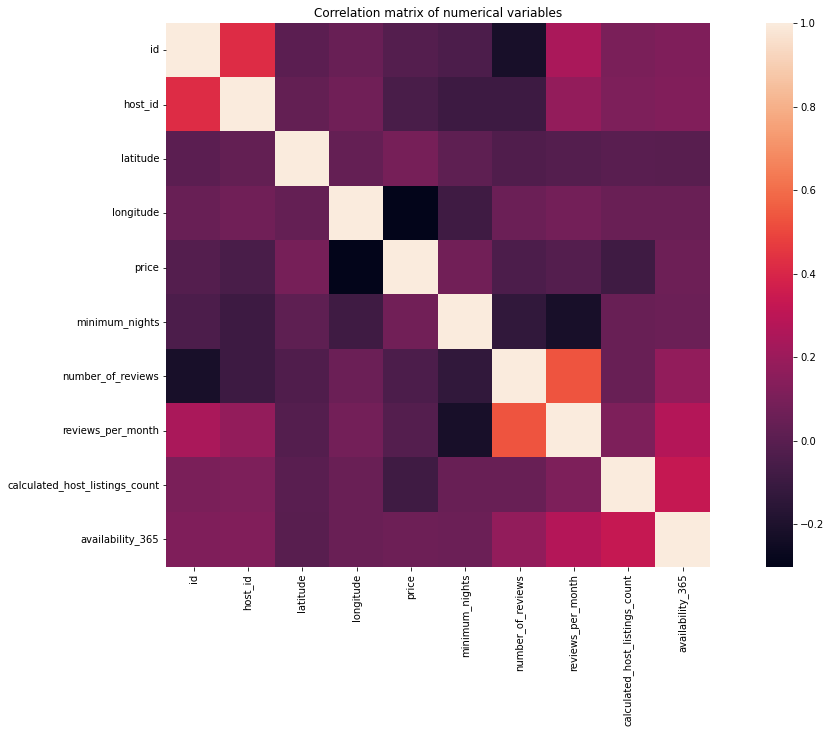

In [ ]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(method='kendall'), square=True)
plt.title(title)
plt.ioff()

here only number_of_reviews and reviews_per_month are strongly correlated.

now look  the variable neighbourhood_group

In [ ]:
variable=data.groupby('neighbourhood_group')['id'].count().reset_index()
variable

,neighbourhood_group,id
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


In [ ]:
#now Seaborn color palette 
colors = sns.color_palette('bright')[0:5]

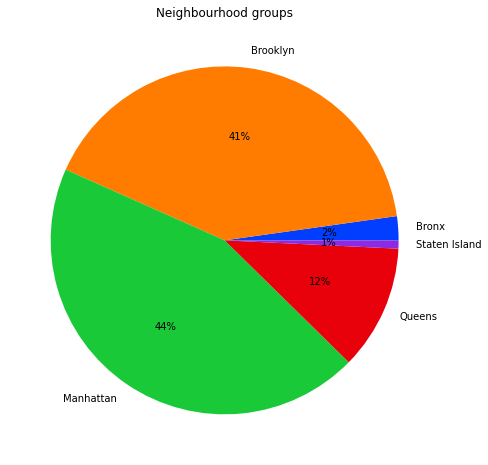

In [ ]:
#now pie chart
plt.pie(variable['id'],labels=variable['neighbourhood_group'], colors = colors, autopct='%.0f%%')
plt.title("Neighbourhood groups")
plt.show()

The scatter plot

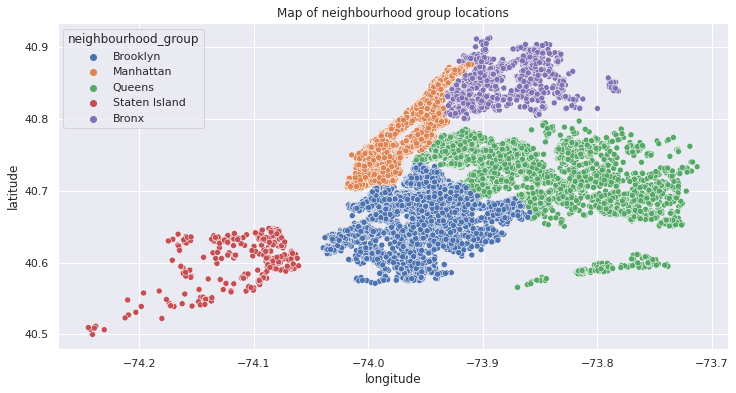

In [ ]:
title='Map of neighbourhood group locations'
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['neighbourhood_group']).set_title(title)
plt.ioff()

by pie chart it is clear that Airbnb has most hotels from Manhattan,and then from Brooklyn and then from Bronx and Staten Island .

now look at room type

In [ ]:
temp=data.groupby('room_type')['id'].count().reset_index()

In [ ]:
temp.rename({'id':'count'},axis=1,inplace=True)

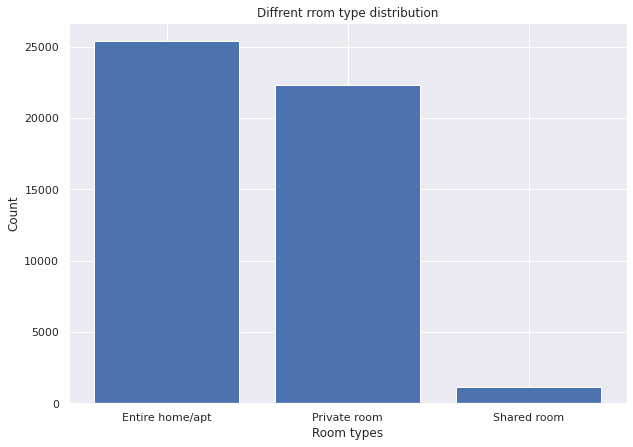

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.xlabel("Room types")
plt.ylabel("Count")
plt.title("Diffrent rrom type distribution")
plt.bar(temp['room_type'],temp['count'])
plt.show()

Listing of all home or appartment is the highest followed by private rooms and at last comes shared rooms.

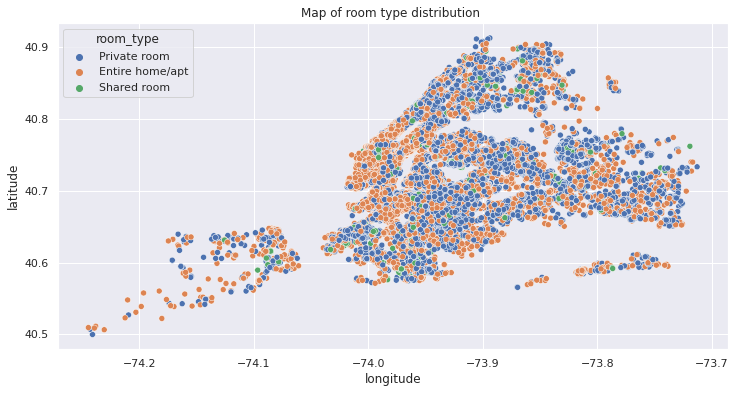

In [ ]:
#location-wise distribution of type of room 
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['room_type']).set_title('Map of room type distribution ')
plt.ioff()

now look at room type in every neighbourhood group

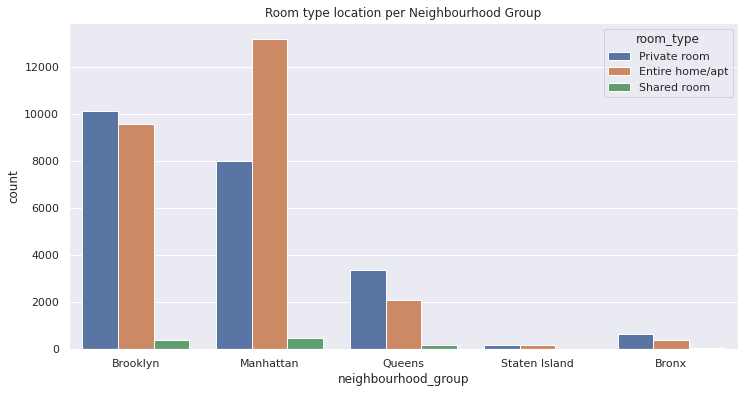

In [ ]:
title = 'Room type location per Neighbourhood Group'
sns.countplot(x='neighbourhood_group',hue='room_type', data=data);
plt.title(title)
plt.ioff()

Listing of all home or apartment is the highest in Manhattan while Brooklyn has private room listing at the highest though entire home or apt listing is not so far behind.It can be observed that shared rooms have  less listing in each of  neighbourhood groups

Now  look at the  important and interesting attribute of dataset the price

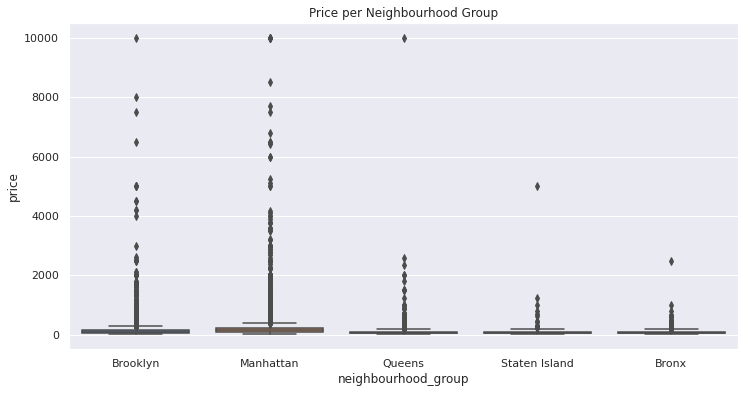

In [ ]:
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()

From the above boxplot it can be observed that most of the listings in various neighbourhood groups are in lower range. For the proper analysis of the price attribute in various neighbourhood groups we have to divide our data set. One group can be of listing having higher value and a second group having lower values.Now the question is on what value the price variable must be divided? At first my thinking was to take median of the price attribute as the pivot but it would not have given a good analysis since the box plot seems skewed.Therefore we are taking highest median of price of Airbnb listing amoung the neighbourhood groups.

In [ ]:
title = 'Median Price per Neighbourhood Group'
temp= data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')

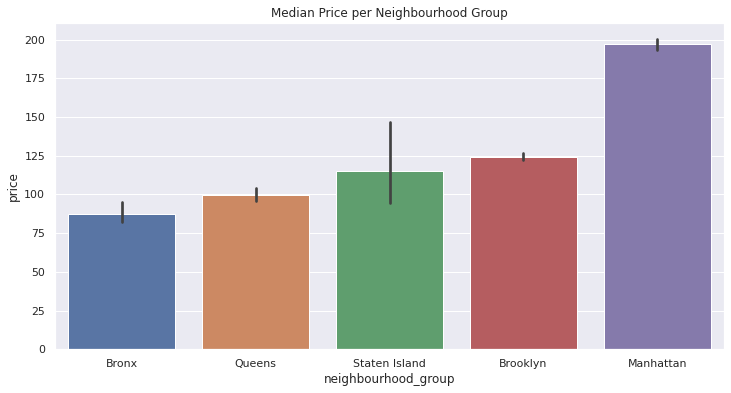

In [ ]:
sns.barplot(x=data['neighbourhood_group'], y=data["price"], order=temp['neighbourhood_group'])
plt.title(title)
plt.ioff()

Manhattan have some really expensive proprties.Median price range in Manhattan is around 175-180.Pivot point for this analysis will be 175 dollars

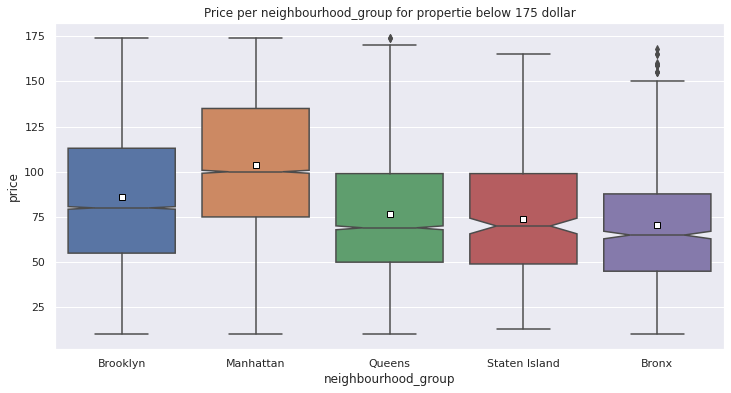

In [ ]:
title = 'Price per neighbourhood_group for propertie below 175 dollar'
data_below=data.loc[data['price'] < 175]
#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_below, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()


From the above observation of price distribution less than 175 dollar amoung neighbourhood groups it can be observed:-
1. Manhattan has highest price listing in this group of average price close to 100 dollars followed by Brooklyn at average price close to 80 dollars
2. Queens and Staten island have pretty similar distribution with a average price close to 65 dollars
3. Bronx has the lowest price distribution eith average close to 60 dollars

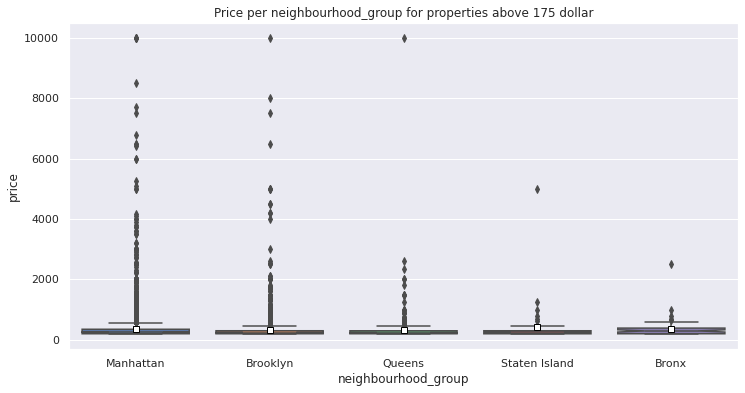

In [ ]:
title = 'Price per neighbourhood_group for properties above 175 dollar'
data_above=data.loc[data['price'] > 175]
#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_above, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

Price distribution in above 175 dollar group is very similar.Mahattan seems to have large number of outliers from which it can also be concluded that Mahnattan has highest number of very expencive properties followed by Brooklyn,Queens,Staten island and Bronx.

Price of properties in both groups seems to significantly dependent on the location!!!

In [ ]:
temp= data.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')

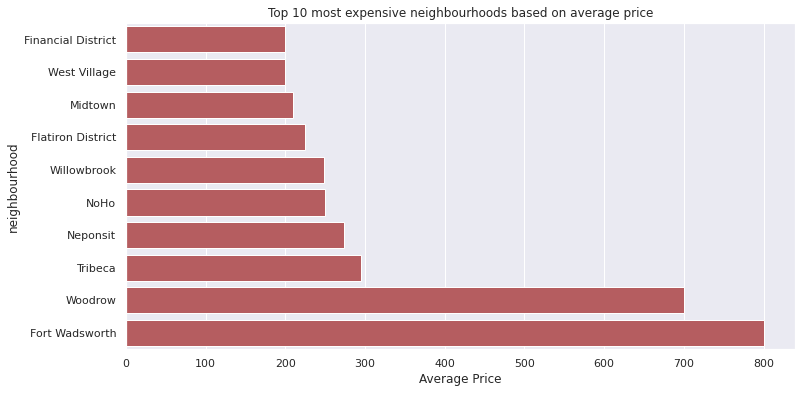

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[-10:],
            label="Total", color="r").set(xlabel='Average Price')
plt.title('Top 10 most expensive neighbourhoods based on average price')
plt.show()

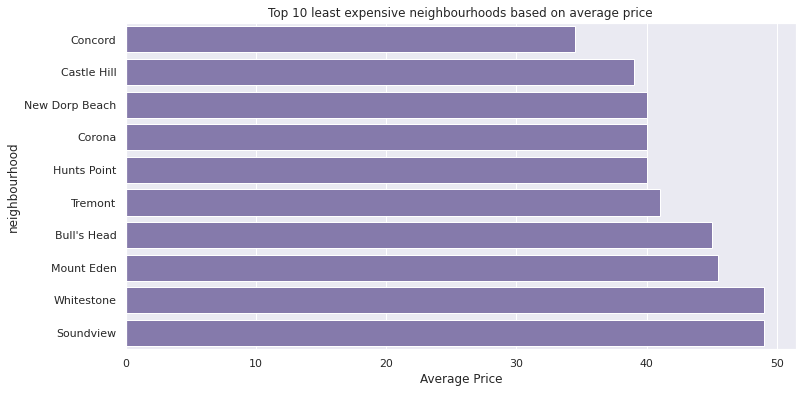

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[:10],
            label="Total", color="m").set(xlabel='Average Price')
plt.title('Top 10 least expensive neighbourhoods based on average price')
plt.show()

Lets check price relation with type of rooms

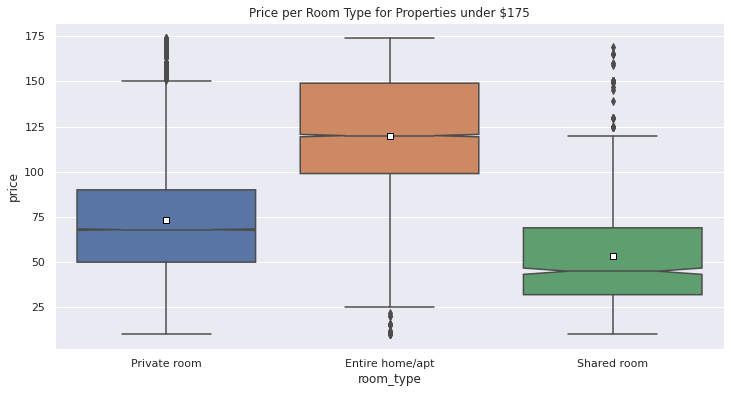

In [ ]:
title = 'Price per Room Type for Properties under $175'
sns.boxplot(x='room_type', y='price', data=data_below, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

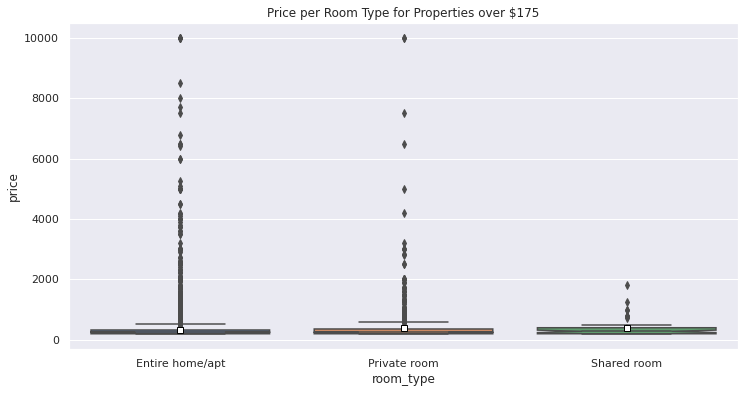

In [ ]:
title = 'Price per Room Type for Properties over $175'
data_filtered = data.loc[data['price'] > 175]
sns.boxplot(x='room_type', y='price', data=data_above, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

Most expensive listing are of entire home/apartment ,then comes private rooms and shared rooms are the cheapest.

Price relation with minimum nights

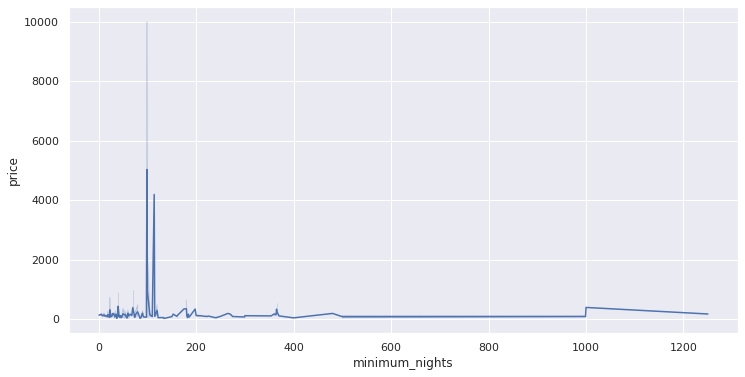

In [ ]:
sns.lineplot(x='minimum_nights',y='price',data=data)
plt.show()

Price relation with number_of_reviews

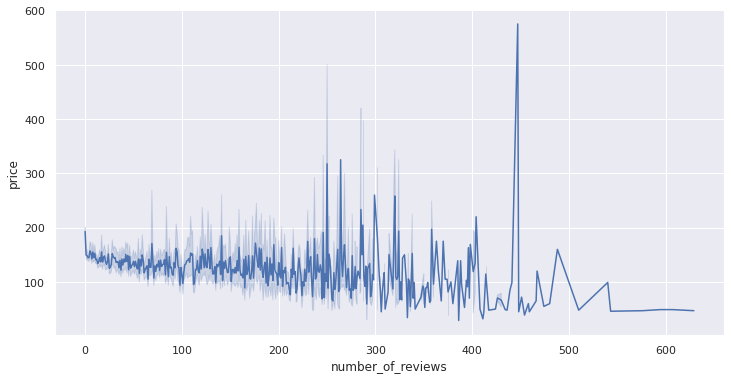

In [ ]:
sns.lineplot(x='number_of_reviews',y='price',data=data)
plt.show()


Price relation with reviews_per_month

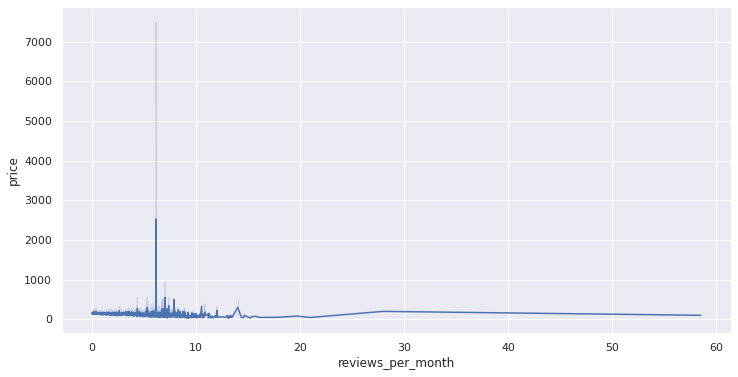

In [ ]:
sns.lineplot(x='reviews_per_month',y='price',data=data)
plt.show()

Price vs calculated_host_listings_count

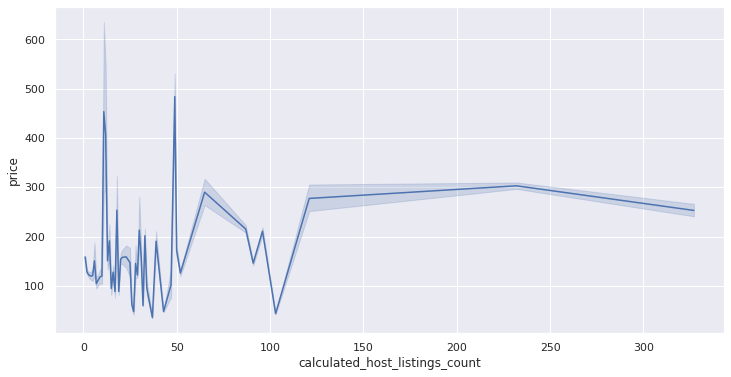

In [ ]:
sns.lineplot(x='calculated_host_listings_count',y='price',data=data)
plt.show()

Price relation with availability_365

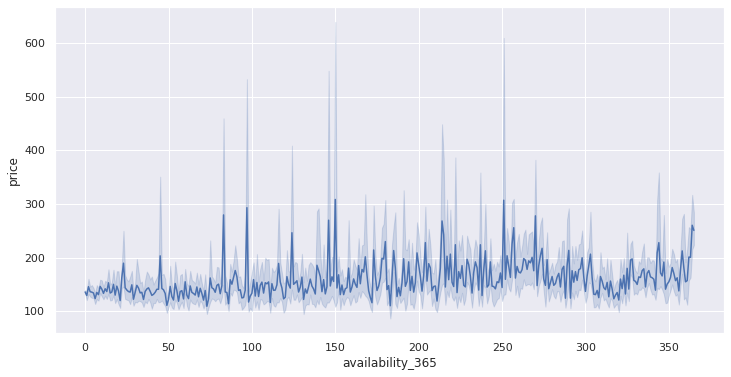

In [ ]:
sns.lineplot(x='availability_365',y='price',data=data)
plt.show()

Conclusion:


Double-click (or enter) to edit